In [3]:
%pip install MITgcmutils

  Using cached MITgcmutils-0.1.2-py3-none-any.whl (49 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
 # import MITgcmutils
import MITgcmutils
import numpy as np
import matplotlib.pyplot as plt
import os

### control variable

In [5]:
# define path to ctrl simulation
ctrl = '/home/jovyan/MITgcm/my_exp/ctrl/'
# open grid* files and load global X coordinate of cell center
nc = MITgcmutils.mnc_files(ctrl + 'mnc*/grid.t*.nc')
xc = nc.variables['XC'][:]
yc = nc.variables['YC'][:]
nc.close()
# open Diag* files and load global potential temperature
ncv = MITgcmutils.mnc_files(ctrl + 'mnc*/Diag.*.nc')
ptemp = ncv.variables['THETA'][:]
salt=ncv.variables['SALT'][:]
ncv.close()

In [6]:
salt;

In [7]:
#salt_annual=np.mean(salt, axis=0)
#ptemp_anual=np.mean(ptemp, axis=0)

### observation variable

In [8]:
# Specify your file name and possibly the path to this file
filein = '/home/jovyan/MITgcm/my_exp/ctrl/lev_t.bin'
filein2 = '/home/jovyan/MITgcm/my_exp/ctrl/lev_s.bin'
# MITgcm likes its binary in big endian, float ('>f') or double ('>d')
raw = np.fromfile(filein, dtype='>f')
raw2 = np.fromfile(filein2, dtype='>f')
# reshape raw to a numpy array of dimensions (12,40, 90) (time,vertical,lat,lon)
ptemp_obs=np.reshape(raw, (12,15,40,90))
salt_obs=np.reshape(raw2, (12,15,40,90))

In [9]:
#average observational data analysis
ptemp_obs_annual=np.mean(ptemp_obs,axis=(0,1))
salt_obs_annual=np.mean(salt_obs,axis=(0,1))

# obs-ctrl
ptemp_obs_annual_ctrl=ptemp[1] - ptemp_obs_annual
salt_obs_annual_ctrl=salt[1]- salt_obs_annual

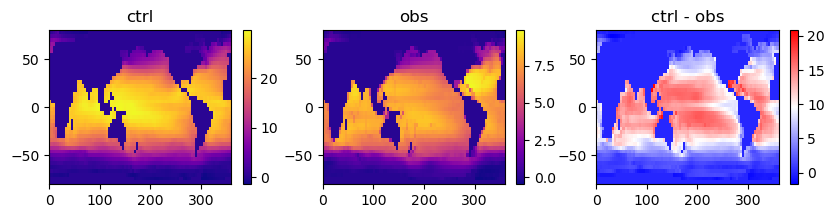

In [10]:
fig, ax=plt.subplots(1,3,figsize=(10,2))
# plot 1
ax[0].pcolormesh(xc,yc,ptemp[9,0,...], cmap='plasma')
ax[0].set_title('ctrl')
sm0 = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmin=ptemp[9,0,...].min(),
                                                                    vmax=ptemp[9,0,...].max()))
sm0.set_array([])
fig.colorbar(sm0, ax=ax[0])

# plot 2
ax[1].pcolormesh(xc,yc,ptemp_obs_annual, cmap='plasma')
ax[1].set_title('obs')
sm1 = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmin=ptemp_obs_annual.min(),
                                                                    vmax=ptemp_obs_annual.max()))
sm1.set_array([])
fig.colorbar(sm1, ax=ax[1])

# plot 3
ax[2].pcolormesh(xc,yc,ptemp_obs_annual_ctrl[1,:,:], cmap='bwr')
ax[2].set_title('ctrl - obs')

sm2 = plt.cm.ScalarMappable(cmap=plt.cm.bwr, norm=plt.Normalize(vmin=ptemp_obs_annual_ctrl[1,:,:].min(), 
                                                                    vmax=ptemp_obs_annual_ctrl[1,:,:].max()))
sm2.set_array([])

fig.colorbar(sm2, ax=ax[2]);

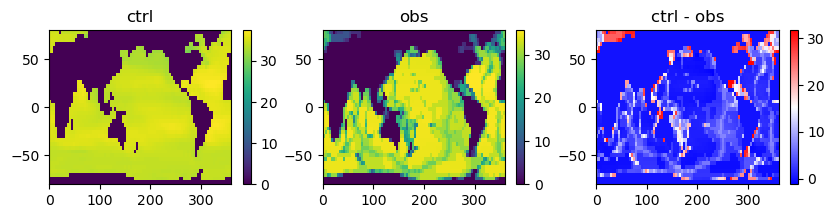

In [11]:
fig, ax=plt.subplots(1,3,figsize=(10,2))
# plot 1


ax[0].pcolormesh(xc,yc,salt[9,0,...], cmap='viridis')
ax[0].set_title('ctrl')
sm0 = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=salt[9,0,...].min(),
                                                                    vmax=salt[9,0,...].max()))
sm0.set_array([])
fig.colorbar(sm0, ax=ax[0])

# plot 2
ax[1].pcolormesh(xc,yc,salt_obs_annual, cmap='viridis')
ax[1].set_title('obs')
sm1 = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=salt_obs_annual.min(),
                                                                    vmax=salt_obs_annual.max()))
sm1.set_array([])
fig.colorbar(sm1, ax=ax[1])

# plot 3
ax[2].pcolormesh(xc,yc,salt_obs_annual_ctrl[1,:,:], cmap='bwr')
ax[2].set_title('ctrl - obs')

sm2 = plt.cm.ScalarMappable(cmap=plt.cm.bwr, norm=plt.Normalize(vmin=salt_obs_annual_ctrl[1,:,:].min(), 
                                                                    vmax=salt_obs_annual_ctrl[1,:,:].max()))
sm2.set_array([])

fig.colorbar(sm2, ax=ax[2]);